# Sales Analysis

In [126]:
#import necessary libraries

import pandas as pd
import os

#### Merging 12months of sales data into a single file into CSV file

In [14]:

files = [file for file in os.listdir("./Sales_Data")]

all_months_data = pd.DataFrame()
for file in files:
    #print(file)
    df = pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data,df])

#all_months_data.head()

all_months_data.to_csv("all_data.csv",index=False)

### Read in update csv file

In [24]:
all_data =pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001"


### Clean up data



In [56]:
#Remove NAN values

nan_df = all_data[all_data.isna().any(axis=1)]

all_data =all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",4


In [55]:
# Find 'Or' and delete it

all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']


#### Convert columns to the correct type

In [60]:
all_data['Quantity Ordered']= pd.to_numeric(all_data['Quantity Ordered'])   #make int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) #make float

all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",4


### Augment data with additional columns

#### Task 2: Add month Column 

In [58]:
all_data['Month'] = all_data['Order Date'].str[0:2]

all_data['Month'].replace('/'," ", regex=True, inplace=True)
all_data['Month'] = all_data['Month'].astype('int32')


all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",4


#### Task 3: Add total amounts per order

In [61]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Task 4: Add a city column

In [82]:
# Lets use .apply method

#lambda used for getting information from a cell content
all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])

all_data.head(10)



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
2,176560,Google Phone,1,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
4,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176562,USB-C Charging Cable,1,11.95,4/29/2019 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco
6,176563,Bose SoundSport Headphones,1,99.99,4/2/2019 7:46,"668 Center St, Seattle, WA 98101",4,99.99,Seattle
7,176564,USB-C Charging Cable,1,11.95,4/12/2019 10:58,"790 Ridge St, Atlanta, GA 30301",4,11.95,Atlanta
8,176565,Macbook Pro Laptop,1,1700.00,4/24/2019 10:38,"915 Willow St, San Francisco, CA 94016",4,1700.00,San Francisco
9,176566,Wired Headphones,1,11.99,4/8/2019 14:05,"83 7th St, Boston, MA 02215",4,11.99,Boston


In [96]:
# another apply method
#creating function

def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1] #split state by name and code name

#all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' ('+get_state(x) +') ')
all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

all_data.head(5)




,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
2,176560,Google Phone,1,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [77]:
all_data['Purchase Address']

0                      917 1st St, Dallas, TX 75001
1                 682 Chestnut St, Boston, MA 02215
2              669 Spruce St, Los Angeles, CA 90001
3              669 Spruce St, Los Angeles, CA 90001
4                 333 8th St, Los Angeles, CA 90001
5            381 Wilson St, San Francisco, CA 94016
6                  668 Center St, Seattle, WA 98101
7                   790 Ridge St, Atlanta, GA 30301
8            915 Willow St, San Francisco, CA 94016
9                       83 7th St, Boston, MA 02215
10                444 7th St, Los Angeles, CA 90001
11                    438 Elm St, Seattle, WA 98101
12                    657 Hill St, Dallas, TX 75001
13                    186 12th St, Dallas, TX 75001
14                253 Johnson St, Atlanta, GA 30301
15          149 Dogwood St, New York City, NY 10001
16         214 Chestnut St, San Francisco, CA 94016
17                20 Hill St, Los Angeles, CA 90001
18                20 Hill St, Los Angeles, CA 90001
19          

#### Question 1: What was the best month for sales? How much was earned that month?

In [70]:
#Group by month sales
results =all_data.groupby('Month').sum()
results

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


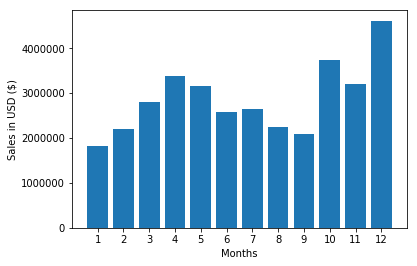

In [75]:
#plot to visualize the sales

import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months,results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Months')
plt.show()

#### Question 2: What city had the highest number of sales

In [102]:
results_city = all_data.groupby('City').sum()
results_city

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


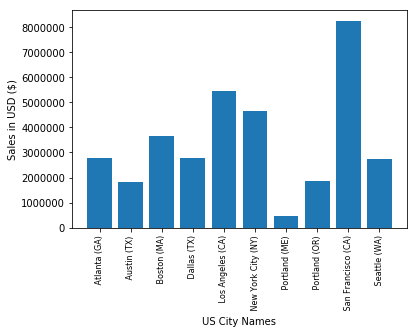

In [103]:
#plot to visualize the sales

import matplotlib.pyplot as plt

#city_name = all_data['City'].unique()
city_name = [city for city, df  in all_data.groupby('City')]

plt.bar(city_name,results_city['Sales'])
plt.xticks(city_name,rotation = 'vertical', size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('US City Names')
plt.show()

#### Question 3: What time should we display ads to maximize likelihood of customer's buying product?

In [128]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])




In [129]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Order_date,Order_Date
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),2019-04-19 08:46:00,2019-04-19 08:46:00
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),2019-04-07 22:30:00,2019-04-07 22:30:00
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),2019-04-12 14:38:00,2019-04-12 14:38:00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),2019-04-12 14:38:00,2019-04-12 14:38:00
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),2019-04-30 09:27:00,2019-04-30 09:27:00


In [131]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Order_date,Order_Date,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),2019-04-19 08:46:00,2019-04-19 08:46:00,8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),2019-04-07 22:30:00,2019-04-07 22:30:00,22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),2019-04-12 14:38:00,2019-04-12 14:38:00,14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),2019-04-12 14:38:00,2019-04-12 14:38:00,14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),2019-04-30 09:27:00,2019-04-30 09:27:00,9,27


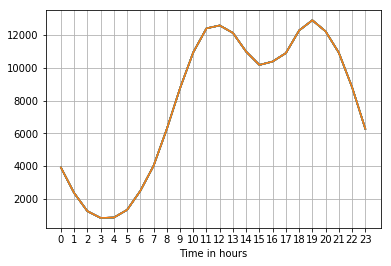

In [134]:
#group by by min and hour

hours = [hour for hour, df  in all_data.groupby('Hour')]

#plot line chart

plt.plot(hours,all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Time in hours')
plt.ylabel('No of orders')
plt.grid()
plt.show()

##recommendation hours is around 11am(~11~) and 7pm(~19~)



#### Question 4: What products are often sold the most?

In [136]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

#press shift tab at end to see guides
df.head(20)



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Order_date,Order_Date,Hour,Minute
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),2019-04-12 14:38:00,2019-04-12 14:38:00,14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),2019-04-12 14:38:00,2019-04-12 14:38:00,14,38
17,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),2019-04-03 19:42:00,2019-04-03 19:42:00,19,42
18,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),2019-04-03 19:42:00,2019-04-03 19:42:00,19,42
29,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),2019-04-07 11:31:00,2019-04-07 11:31:00,11,31
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),2019-04-07 11:31:00,2019-04-07 11:31:00,11,31
31,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco (CA),2019-04-10 17:00:00,2019-04-10 17:00:00,17,0
32,176586,Google Phone,1,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,600.00,San Francisco (CA),2019-04-10 17:00:00,2019-04-10 17:00:00,17,0
118,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,14.95,New York City (NY),2019-04-12 11:07:00,2019-04-12 11:07:00,11,7
119,176672,USB-C Charging Cable,1,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,11.95,New York City (NY),2019-04-12 11:07:00,2019-04-12 11:07:00,11,7


In [139]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


df = df[['Order ID','Grouped']].drop_duplicates()

df.head()

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [147]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
#print(count)

#count.most_common(10)

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [107]:
all_data['Product'].unique()

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor'],
      dtype=object)

In [112]:
all_data['Product'].value_counts()

USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: Product, dtype: int64

#### Question 5: What product the most and why the most??

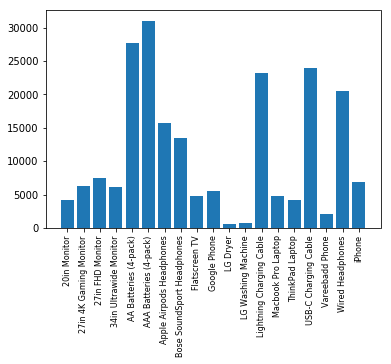

In [153]:
product_group =all_data.groupby('Product')

quantity_ordered = product_group.sum()['Quantity Ordered']

products= [product for product,df in product_group]

plt.bar(products,quantity_ordered)
plt.xlabel('Product')
plt.ylabel('Quantity Ordered') 
plt.xticks(products,rotation='vertical',size=8)
plt.show()

In [154]:
#overlaying barchart above with another y axis

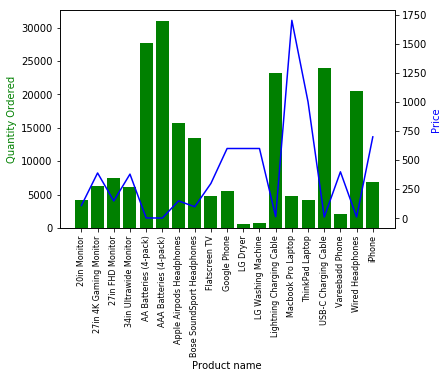

In [160]:
prices = all_data.groupby('Product').mean()['Price Each']

#prices


fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products,quantity_ordered, color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product name')
ax1.set_ylabel('Quantity Ordered', color='g')

ax1.set_xticklabels(products,rotation='vertical',size=8)
ax2.set_ylabel('Price', color='b')


plt.show()